# Music Recommendation System 

`Author:` [Prashant Sharma](https://github.com/Prashantpq)\
`Date:` 03.December.2024\
`Dataset:` [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

### About Dataset (Meta data)
#### Context
This is Spotify Million Song Dataset. This dataset contains song names, artists names, link to the song and lyrics. This dataset can be used for recommending songs, classifying or clustering songs.

### Content
#### Column Descriptions:
* `artists:` The artists' names who performed the track.
* `song:` The name of the song.
* `link:` The link of the song.
* `text:` The text or lyrics that song contain. 

# `Import Libraries`

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# `Load Dataset`

In [36]:
df = pd.read_csv('Data/spotify_millsongdata.csv')
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \r\nYou're e..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \r\nCouldn't s...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \r\nI'm sitting all ...


# `Data Exploration and Preprocessing`

In [40]:
df.shape

(57650, 4)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [42]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [46]:
df = df.drop(['link'], axis=1)

`As there was no use of link column in the dataset so we have removed it`

In [48]:
df.head(10)

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,"Chiquitita, tell me what's wrong \r\nYou're e..."
8,ABBA,Crazy World,I was out with the morning sun \r\nCouldn't s...
9,ABBA,Crying Over You,I'm waitin' for you baby \r\nI'm sitting all ...


In [50]:
df.shape

(57650, 3)

# `Exploratory Data Analysis (EDA)`

`Analysis of Artist Column`

In [61]:
artist_track_counts= df['artist'].value_counts().head(10)

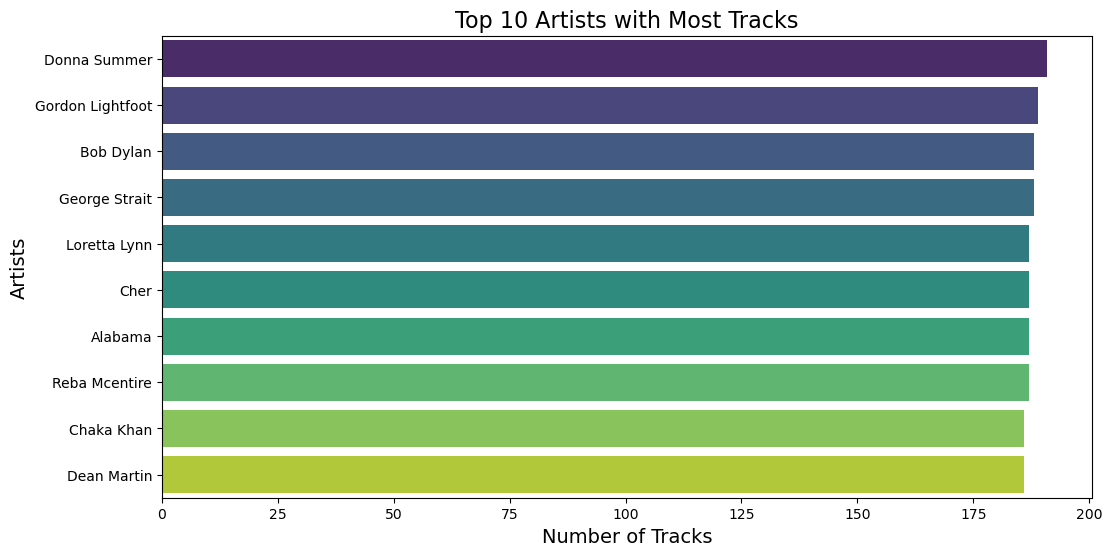

In [62]:
# Plot the top 10 artists with the most tracks
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_track_counts.values, y=artist_track_counts.index, palette="viridis")
plt.title("Top 10 Artists with Most Tracks", fontsize=16)
plt.xlabel("Number of Tracks", fontsize=14)
plt.ylabel("Artists", fontsize=14)
plt.show()

In [65]:
artist_track_counts

artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64